In [28]:
import numpy as np
import cv2
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

# Чорно-біле зображення

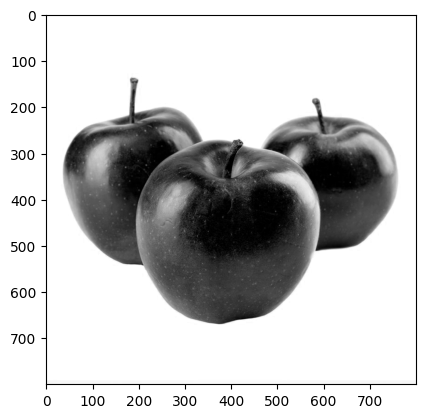

In [29]:
img = cv2.imread("apple.jpg")
imshow(img[:, :, 0], cmap="gray")

# Метод Осту

In [30]:
def otsu(hsg):
    p = hsg / np.sum(hsg)  # probs
    q1, q2 = np.zeros(256), np.zeros(256)  # sum probs
    m1, m2 = np.zeros(256), np.zeros(256)  # avg
    s1, s2 = np.zeros(256), np.zeros(256)  # dispersion

    for t in range(0, 255):
        t_n = t + 1 if t < 255 else 255

        for i in range(0, t):
            q1[t] = p[i]
        for i in range(t_n, 255):
            q2[t] = p[i]

        for i in range(0, t):
            m1[t] = (i * p[i]) / (q1[t] + 1e-10)
        for i in range(t, 255):
            m2[t] = (i * p[i]) / (q2[t] + 1e-10)

        for i in range(0, t):
            s1[t] += np.square(i - m1[t]) * p[i] / (q1[t] + 1e-10)
        for i in range(t, 255):
            s2[t] += np.square(i - m2[t]) * p[i] / (q2[t] + 1e-10)

    s_acc = np.zeros(256)
    s_acc = q1 * q2 * np.square(m1 - m2)

    return np.argmax(s_acc)

In [31]:
def binarize(img, threshold):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_bw_ref = np.copy(img_bw)

    img_bw[img_bw >= threshold] = 255
    img_bw[img_bw < threshold] = 0

    res = cv2.cvtColor(img_bw_ref, cv2.COLOR_GRAY2RGB)
    res[:,:,0] = np.maximum(res[:,:,0], img_bw)
    res[:,:,1] = np.minimum(res[:,:,1], 255 - img_bw)
    res[:,:,2] = np.minimum(res[:,:,2], 255 - img_bw)

    return res, img_bw

# Перше зображення

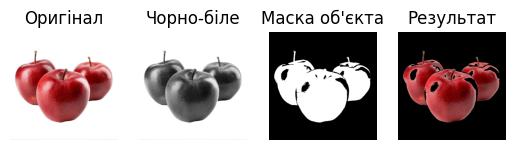

In [32]:
img = cv2.imread("apple.jpg") 
# Перетворюємо зображення в градації сірого
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обчислюємо гістограму
hsg = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()

# Використовуємо метод Отсу 
threshold = otsu(hsg)
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mask_inv = cv2.bitwise_not(mask)

# Вирізаємо об'єкт з оригінального зображення за допомогою маски
extracted_object = np.zeros_like(img)
extracted_object[mask_inv == 255] = img[mask_inv == 255]


plt.subplot(1, 4, 1)
plt.title("Оригінал")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Чорно-біле")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Маска об'єкта")
plt.imshow(mask_inv, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Результат")
plt.imshow(cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Друге зображення

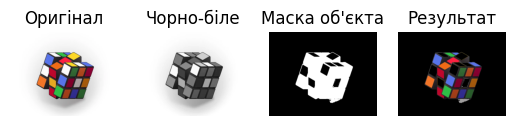

In [37]:
img = cv2.imread("cube.jpg") 
# Перетворюємо зображення в градації сірого
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обчислюємо гістограму
hsg = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()

# Використовуємо метод Отсу 
threshold = otsu(hsg)
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mask_inv = cv2.bitwise_not(mask)

# Вирізаємо об'єкт з оригінального зображення за допомогою маски
extracted_object = np.zeros_like(img)
extracted_object[mask_inv == 255] = img[mask_inv == 255]


plt.subplot(1, 4, 1)
plt.title("Оригінал")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Чорно-біле")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Маска об'єкта")
plt.imshow(mask_inv, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Результат")
plt.imshow(cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Третє зображення

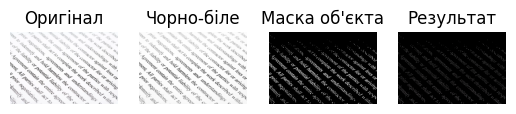

In [34]:
img = cv2.imread("text_1.jpg") 
# Перетворюємо зображення в градації сірого
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обчислюємо гістограму
hsg = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()

# Використовуємо метод Отсу 
threshold = otsu(hsg)
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mask_inv = cv2.bitwise_not(mask)

# Вирізаємо об'єкт з оригінального зображення за допомогою маски
extracted_object = np.zeros_like(img)
extracted_object[mask_inv == 255] = img[mask_inv == 255]


plt.subplot(1, 4, 1)
plt.title("Оригінал")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Чорно-біле")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Маска об'єкта")
plt.imshow(mask_inv, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Результат")
plt.imshow(cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

# Четверте зображення

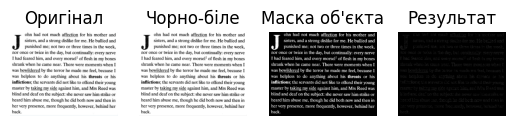

In [35]:
img = cv2.imread("text_2.png") 
# Перетворюємо зображення в градації сірого
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Обчислюємо гістограму
hsg = cv2.calcHist([img_gray], [0], None, [256], [0, 256]).flatten()

# Використовуємо метод Отсу 
threshold = otsu(hsg)
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mask_inv = cv2.bitwise_not(mask)

# Вирізаємо об'єкт з оригінального зображення за допомогою маски
extracted_object = np.zeros_like(img)
extracted_object[mask_inv == 255] = img[mask_inv == 255]


plt.subplot(1, 4, 1)
plt.title("Оригінал")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Чорно-біле")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Маска об'єкта")
plt.imshow(mask_inv, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Результат")
plt.imshow(cv2.cvtColor(extracted_object, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()